In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate data with multicollinearity
X, y = make_regression(n_samples=200, n_features=10, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


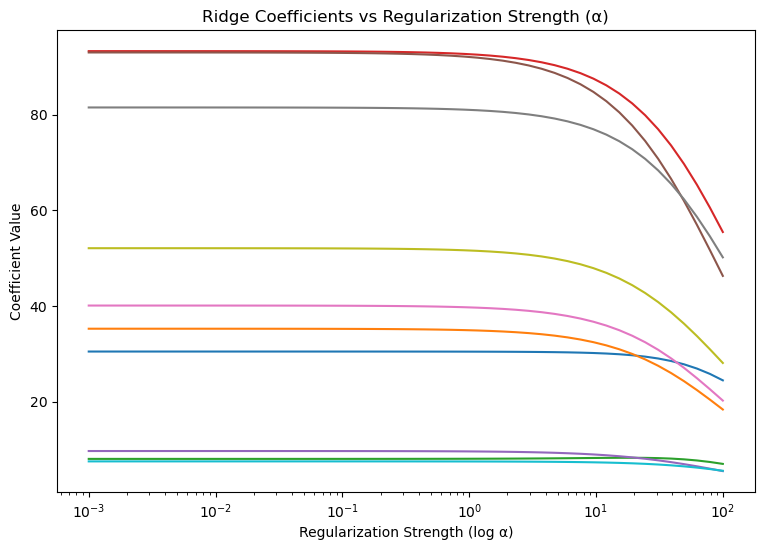

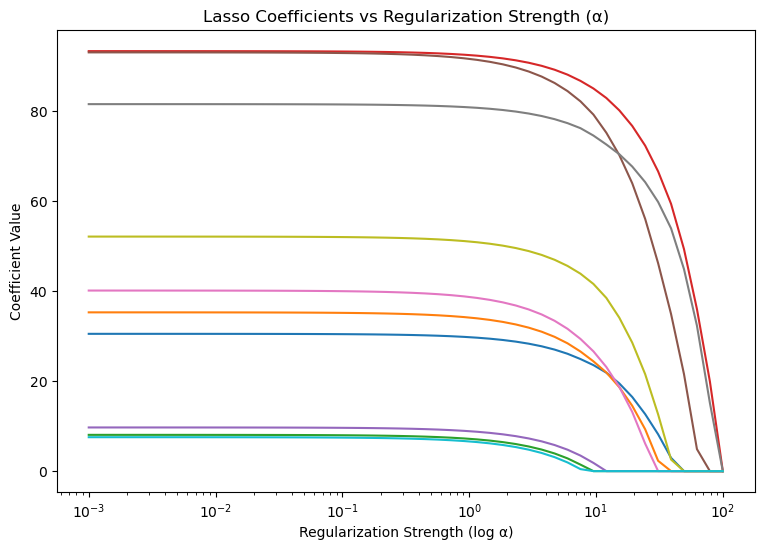

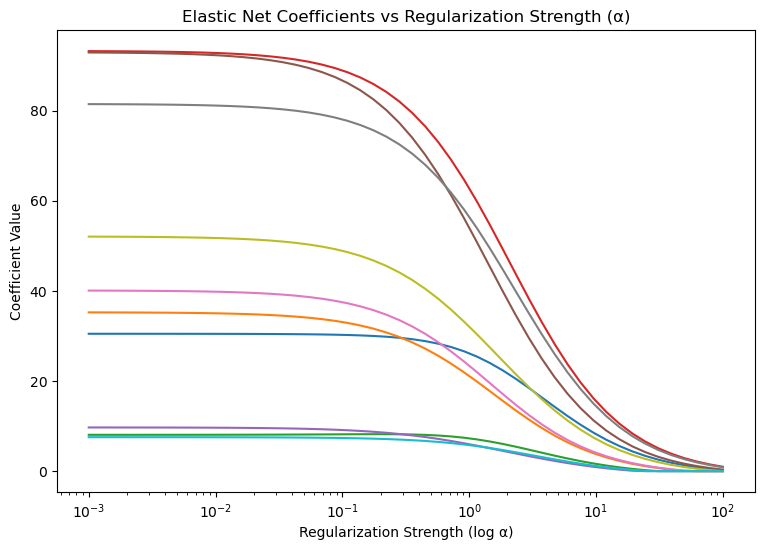

In [2]:
alphas = np.logspace(-3, 2, 50)
ridge_coefs, lasso_coefs, enet_coefs = [], [], []

for a in alphas:
    ridge_coefs.append(Ridge(alpha=a).fit(X_train, y_train).coef_)
    lasso_coefs.append(Lasso(alpha=a, max_iter=10000).fit(X_train, y_train).coef_)
    enet_coefs.append(ElasticNet(alpha=a, l1_ratio=0.5, max_iter=10000).fit(X_train, y_train).coef_)

ridge_coefs, lasso_coefs, enet_coefs = map(np.array, [ridge_coefs, lasso_coefs, enet_coefs])

plt.figure(figsize=(9,6))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.title("Ridge Coefficients vs Regularization Strength (α)")
plt.xlabel("Regularization Strength (log α)")
plt.ylabel("Coefficient Value")
plt.show()

plt.figure(figsize=(9,6))
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.title("Lasso Coefficients vs Regularization Strength (α)")
plt.xlabel("Regularization Strength (log α)")
plt.ylabel("Coefficient Value")
plt.show()

plt.figure(figsize=(9,6))
plt.plot(alphas, enet_coefs)
plt.xscale('log')
plt.title("Elastic Net Coefficients vs Regularization Strength (α)")
plt.xlabel("Regularization Strength (log α)")
plt.ylabel("Coefficient Value")
plt.show()


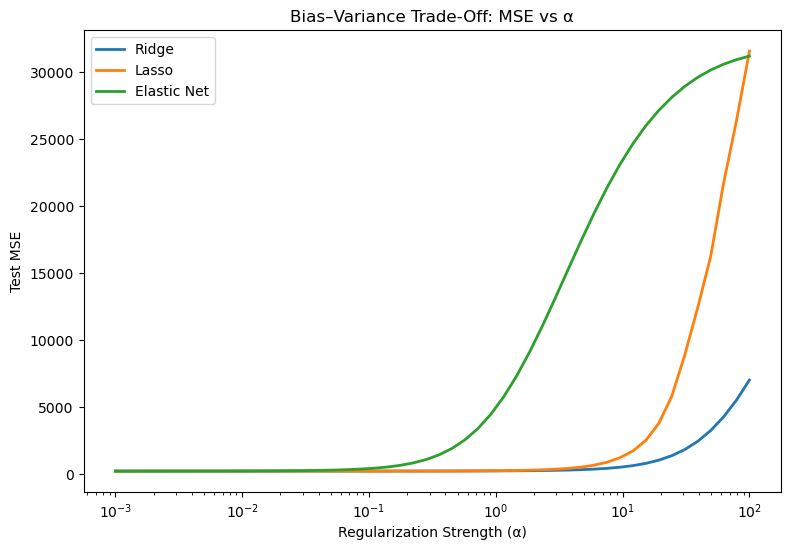

In [3]:
alphas = np.logspace(-3, 2, 50)
ridge_mse, lasso_mse, enet_mse = [], [], []

for a in alphas:
    ridge = Ridge(alpha=a).fit(X_train, y_train)
    lasso = Lasso(alpha=a, max_iter=10000).fit(X_train, y_train)
    enet = ElasticNet(alpha=a, l1_ratio=0.5, max_iter=10000).fit(X_train, y_train)
    
    ridge_mse.append(mean_squared_error(y_test, ridge.predict(X_test)))
    lasso_mse.append(mean_squared_error(y_test, lasso.predict(X_test)))
    enet_mse.append(mean_squared_error(y_test, enet.predict(X_test)))

plt.figure(figsize=(9,6))
plt.plot(alphas, ridge_mse, label="Ridge", linewidth=2)
plt.plot(alphas, lasso_mse, label="Lasso", linewidth=2)
plt.plot(alphas, enet_mse, label="Elastic Net", linewidth=2)
plt.xscale('log')
plt.xlabel("Regularization Strength (α)")
plt.ylabel("Test MSE")
plt.title("Bias–Variance Trade-Off: MSE vs α")
plt.legend()
plt.show()


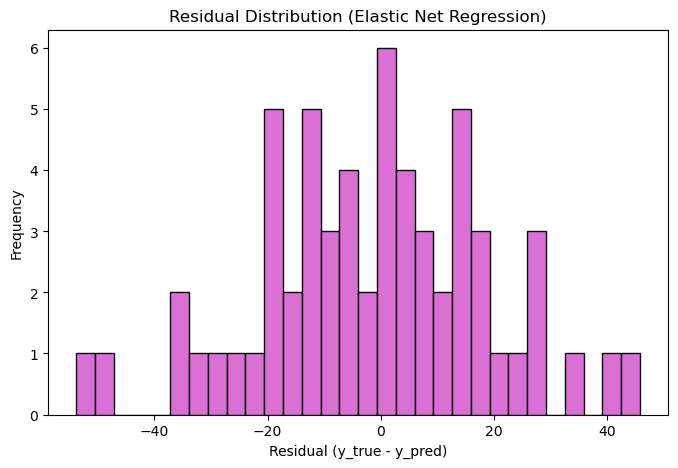

In [4]:
model = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X_train, y_train)
residuals = y_test - model.predict(X_test)

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color='orchid', edgecolor='black')
plt.title("Residual Distribution (Elastic Net Regression)")
plt.xlabel("Residual (y_true - y_pred)")
plt.ylabel("Frequency")
plt.show()


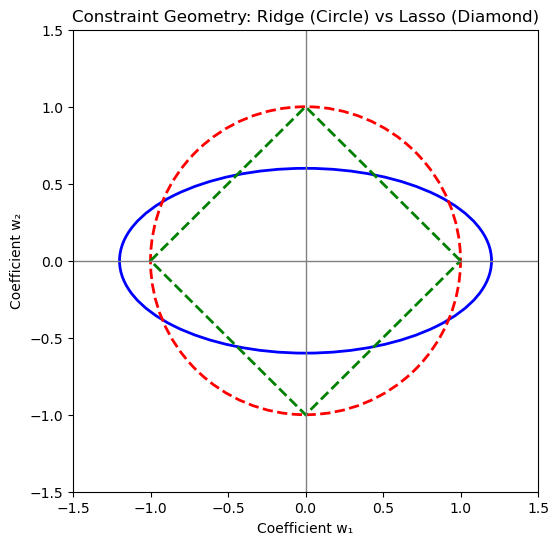

In [5]:
from matplotlib.patches import Ellipse, Polygon

fig, ax = plt.subplots(figsize=(6,6))
# Contours of least-squares cost (circular)
ellipse = Ellipse((0,0), width=2.4, height=1.2, fill=False, color='blue', lw=2)
ax.add_patch(ellipse)

# Ridge constraint (circle)
ridge = plt.Circle((0,0), 1, fill=False, color='red', linestyle='--', lw=2)
ax.add_patch(ridge)
# Lasso constraint (diamond)
lasso = Polygon([[1,0],[0,1],[-1,0],[0,-1]], fill=False, color='green', linestyle='--', lw=2)
ax.add_patch(lasso)

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.title("Constraint Geometry: Ridge (Circle) vs Lasso (Diamond)")
plt.xlabel("Coefficient w₁")
plt.ylabel("Coefficient w₂")
plt.show()


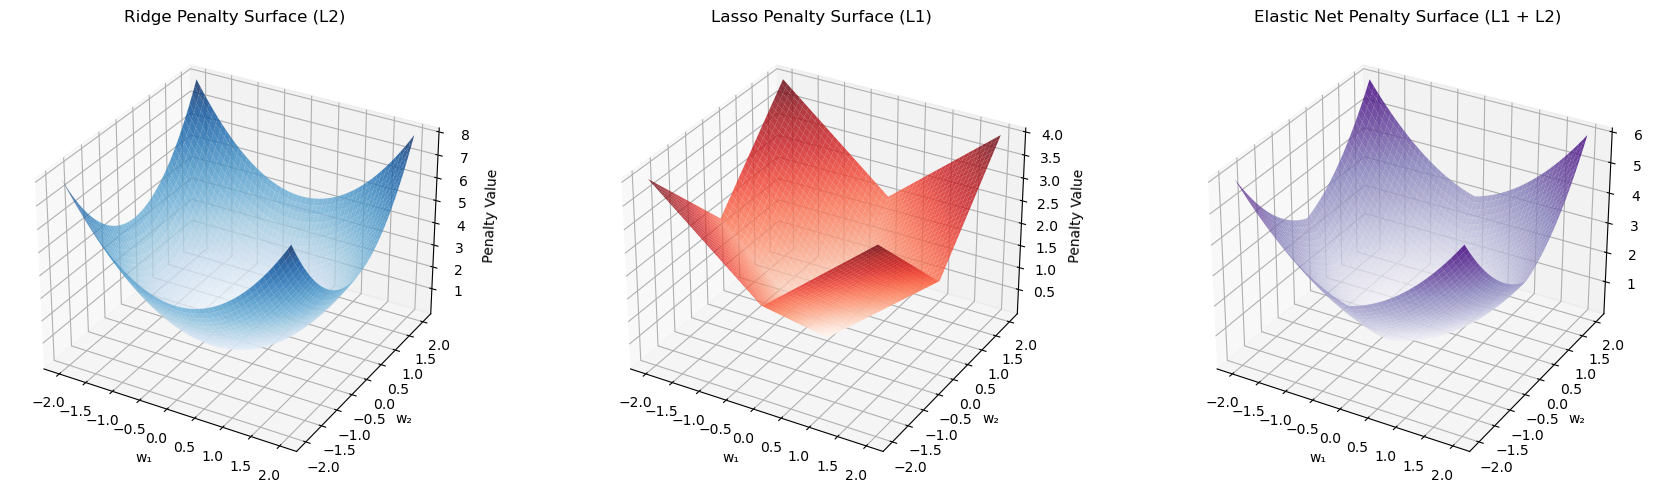

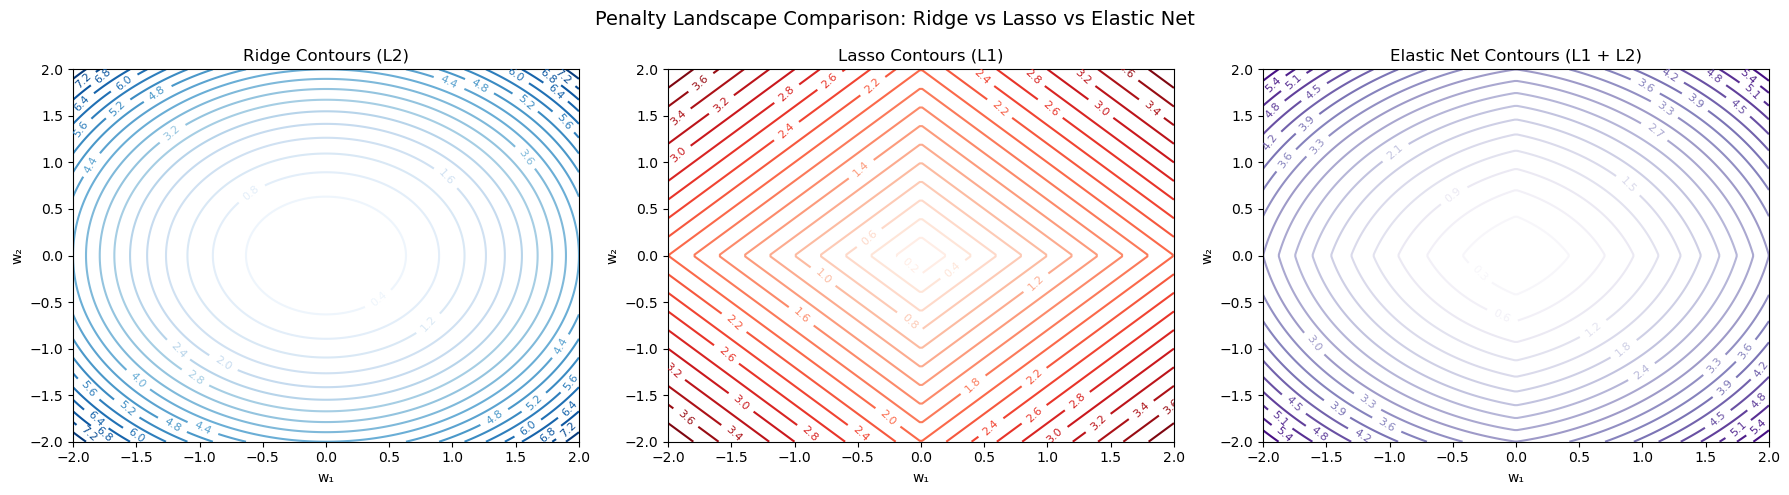

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create coefficient grid
w1, w2 = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))

# Define penalty functions
ridge_penalty = w1**2 + w2**2
lasso_penalty = np.abs(w1) + np.abs(w2)
elastic_penalty = 0.5 * (np.abs(w1) + np.abs(w2)) + 0.5 * (w1**2 + w2**2)

# -------------------------------------
# 3D Penalty Surface Visualization
# -------------------------------------
fig = plt.figure(figsize=(18, 5))

# Ridge 3D
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(w1, w2, ridge_penalty, cmap='Blues', alpha=0.8)
ax1.set_title("Ridge Penalty Surface (L2)", fontsize=12)
ax1.set_xlabel("w₁")
ax1.set_ylabel("w₂")
ax1.set_zlabel("Penalty Value")

# Lasso 3D
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(w1, w2, lasso_penalty, cmap='Reds', alpha=0.8)
ax2.set_title("Lasso Penalty Surface (L1)", fontsize=12)
ax2.set_xlabel("w₁")
ax2.set_ylabel("w₂")
ax2.set_zlabel("Penalty Value")

# Elastic Net 3D
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(w1, w2, elastic_penalty, cmap='Purples', alpha=0.8)
ax3.set_title("Elastic Net Penalty Surface (L1 + L2)", fontsize=12)
ax3.set_xlabel("w₁")
ax3.set_ylabel("w₂")
ax3.set_zlabel("Penalty Value")

plt.tight_layout()
plt.show()

# -------------------------------------
# 2D Contour Projection View
# -------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

contours_ridge = axes[0].contour(w1, w2, ridge_penalty, levels=20, cmap='Blues')
axes[0].clabel(contours_ridge, inline=True, fontsize=8)
axes[0].set_title("Ridge Contours (L2)", fontsize=12)
axes[0].set_xlabel("w₁")
axes[0].set_ylabel("w₂")

contours_lasso = axes[1].contour(w1, w2, lasso_penalty, levels=20, cmap='Reds')
axes[1].clabel(contours_lasso, inline=True, fontsize=8)
axes[1].set_title("Lasso Contours (L1)", fontsize=12)
axes[1].set_xlabel("w₁")
axes[1].set_ylabel("w₂")

contours_enet = axes[2].contour(w1, w2, elastic_penalty, levels=20, cmap='Purples')
axes[2].clabel(contours_enet, inline=True, fontsize=8)
axes[2].set_title("Elastic Net Contours (L1 + L2)", fontsize=12)
axes[2].set_xlabel("w₁")
axes[2].set_ylabel("w₂")

plt.suptitle("Penalty Landscape Comparison: Ridge vs Lasso vs Elastic Net", fontsize=14)
plt.tight_layout()
plt.show()
